# Перцептрон для восприятия цифр
__Суммарное количество баллов: 10__

В этом задании вам предстоит реализовать классический перцептрон, немного улучшить его, и протестировать результат на классической задаче определния цифр по изображениям.

In [115]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import datasets
import copy
import random
from time import time

### Задание 1 (3 балла)
Для начала реализуем простой перцептрон.

#### Методы
`predict(X)` - возвращает предсказанные метки для элементов выборки `X`

`fit(X, y)` - инициализирует веса перцептрона, а затем обновляет их в течении `iterations` итераций. 

#### Параметры конструктора
`iterations` - количество итераций обучения перцептрона

#### Поля
`w` - веса перцептрона размерности `X.shape[1] + 1`. `w[0]` должен соответстовать константе, `w[1:]` - коэффициентам компонент элемента `X`.

In [237]:
class Perceptron:
    def __init__(self, iterations=1000, one_five = False):
        self.iterations = iterations
        self.w = None
        self.one_five = one_five
    
    def fit(self, X, y_old):
        tic = time()
        
        y = copy.deepcopy(y_old)
        y [ y != 1 ] = -1
        
        unos = np.array([[1 for i in range(len(X))]]).transpose()
        X = np.append(unos, X, axis = 1)
        self.w = np.array([i+1 for i in range(len(X[0]))])
        
        for j in range(self.iterations):
            #сюда будем складывать те, которые неправильно предиктнули
            false_predict = []
            for i in range(len(X)):
                cur_sign = np.sign(np.dot(X[i], self.w))
                if cur_sign != 0 and cur_sign != y[i]:
                    false_predict.append(i)
            #вдруг все угадали, тогда выходим
            if len(false_predict) == 0:
                break
            k = random.choice(false_predict)
            self.w = self.w + y[k] * X[k]   
        
        toc = time()
        print('Считалось: '+str(toc-tic)+' sec')
            
            
    def predict(self, X):
        answer = np.ones(len(X))
        for i in range(len(X)):
            x = np.append(np.array([1]), X[i])
            sign = np.sign(np.dot(x, self.w))
            if sign != 0:
                answer[i] = sign
        if self.one_five:
            answer [ answer == -1 ] = 5
        else:
            answer [ answer == -1 ] = 0
        return answer

Посмотрим на то, как наш перцептрон справляется с различными наборами данных

Считалось: 1.7856109142303467 sec


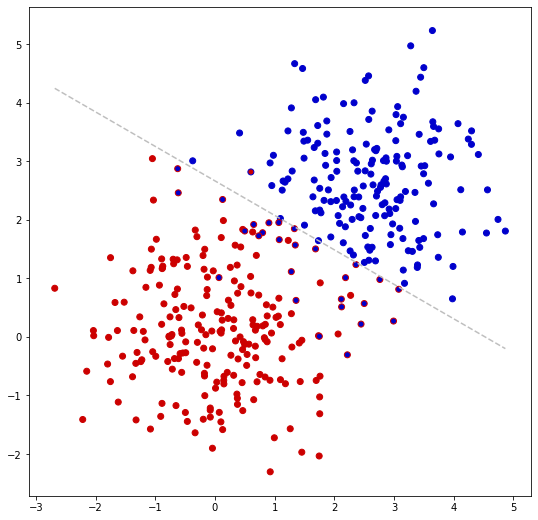

In [240]:
X, true_labels = make_blobs(400, 2, centers=[[0, 0], [2.5, 2.5]])
c = Perceptron()
c.fit(X, true_labels)
visualize(X, true_labels, np.array(c.predict(X)), c.w)

Считалось: 1.9637486934661865 sec


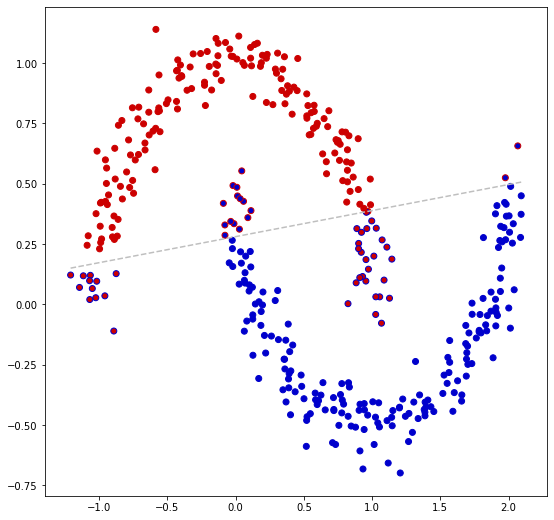

In [239]:
X, true_labels = make_moons(400, noise=0.075)
c = Perceptron()
c.fit(X, true_labels)
visualize(X, true_labels, np.array(c.predict(X)), c.w)

### Задание 2 (2 балл)
Проблема обычной реализации перцептрона в том, что закончить его обучение мы можем с неоптимальными весами, т.к. точность разбиения в зависимости от числа итераций не растет монотонно. Чтобы этого избежать, мы можем оставлять в конце веса той итерации, на которой мы лучше всего разбивали множество `X`.

Реализуем перцептрон с карманом.

#### Методы
`predict(X)` - возвращает предсказанные метки для элементов выборки `X`

`fit(X, y)` - инициализирует веса перцептрона, а затем обновляет их в течении `iterations` итераций. В конце обучения оставляет лучшие веса. 

#### Параметры конструктора
`iterations` - количество итераций обучения перцептрона

#### Поля
`w` - веса перцептрона размерности `X.shape[1] + 1`. `w[0]` должен соответстовать константе, `w[1:]` - коэффициентам компонент элемента `X`.

In [256]:
class PerceptronBest:
    def __init__(self, iterations=1000, one_five = False):
        self.iterations = iterations
        self.w = None
        self.one_five = one_five
    
    def fit(self, X, y_old):
        tic = time()
        
        y = copy.deepcopy(y_old)
        y [ y != 1 ] = -1
        
        unos = np.array([[1 for i in range(len(X))]]).transpose()
        X = np.append(unos, X, axis = 1)
        self.w = np.array([i+1 for i in range(len(X[0]))])
        
        w_arr = []
        err_arr = []
        w_arr.append(copy.deepcopy(self.w))
        
        for j in range(self.iterations):
            #сюда будем складывать те, которые неправильно предиктнули
            false_predict = []
            for i in range(len(X)):
                cur_sign = np.sign(np.dot(X[i], self.w))
                if cur_sign != 0 and cur_sign != y[i]:
                    false_predict.append(i)
            #вдруг все угадали, тогда выходим
            if len(false_predict) == 0:
                break
            k = random.choice(false_predict)
            self.w = self.w + y[k] * X[k]
            w_arr.append(copy.deepcopy(self.w))
            err_arr.append(len(false_predict))
        i_min = -1
        e_min = -1
        for i in range(len(err_arr)):
            if i_min == -1 or err_arr[i] < e_min:
                e_min = err_arr[i]
                i_min = i
        self.w = w_arr[i]
        toc = time()
        print('Считалось: '+str(toc-tic)+' sec')
            
            
    def predict(self, X):
        answer = np.ones(len(X))
        for i in range(len(X)):
            x = np.append(np.array([1]), X[i])
            sign = np.sign(np.dot(x, self.w))
            if sign != 0:
                answer[i] = sign
        if self.one_five:
            answer [ answer == -1 ] = 5
        else:
            answer [ answer == -1 ] = 0
        return answer

In [31]:
def visualize(X, labels_true, labels_pred, w):
    unique_labels = np.unique(labels_true)
    unique_colors = dict([(l, c) for l, c in zip(unique_labels, [[0.8, 0., 0.], [0., 0., 0.8]])])
    plt.figure(figsize=(9, 9))

    if w[1] == 0:
        plt.plot([X[:, 0].min(), X[:, 0].max()], w[0] / w[2])
    elif w[2] == 0:
        plt.plot(w[0] / w[1], [X[:, 1].min(), X[:, 1].max()])  
    else:
        mins, maxs = X.min(axis=0), X.max(axis=0)
        pts = [[mins[0], -mins[0] * w[1] / w[2] - w[0] / w[2]],
               [maxs[0], -maxs[0] * w[1] / w[2] - w[0] / w[2]],
               [-mins[1] * w[2] / w[1] - w[0] / w[1], mins[1]],
               [-maxs[1] * w[2] / w[1] - w[0] / w[1], maxs[1]]]
        pts = [(x, y) for x, y in pts if mins[0] <= x <= maxs[0] and mins[1] <= y <= maxs[1]]
        x, y = list(zip(*pts))
        plt.plot(x, y, c=(0.75, 0.75, 0.75), linestyle="--")
    
    colors_inner = [unique_colors[l] for l in labels_true]
    colors_outer = [unique_colors[l] for l in labels_pred]
    plt.scatter(X[:, 0], X[:, 1], c=colors_inner, edgecolors=colors_outer)
    plt.show()

Посмотрим на то, как наш перцептрон справляется с различными наборами данных

Считалось: 1.225318193435669 sec


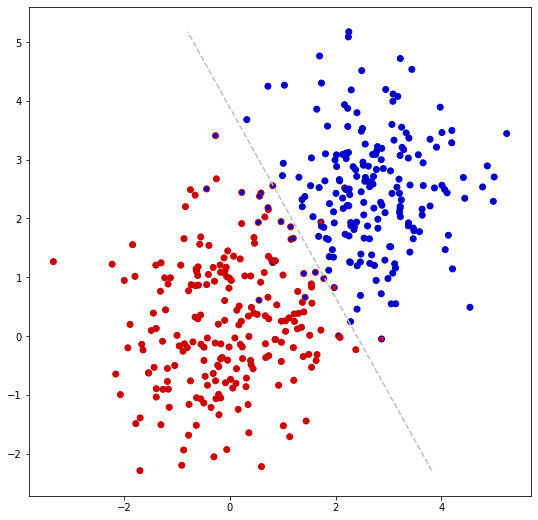

In [257]:
X, true_labels = make_blobs(400, 2, centers=[[0, 0], [2.5, 2.5]])
c = PerceptronBest()
c.fit(X, true_labels)
visualize(X, true_labels, np.array(c.predict(X)), c.w)

Считалось: 1.6089730262756348 sec


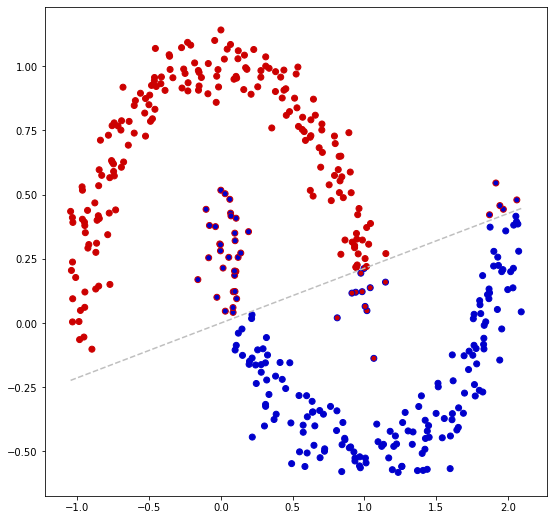

In [258]:
X, true_labels = make_moons(400, noise=0.075)
c = PerceptronBest()
c.fit(X, true_labels)
visualize(X, true_labels, np.array(c.predict(X)), c.w)

### Задание 3 (1 балл)
Реализуйте метод `transform_images(images)`, который преобразует изображения в двумерные векторы. Значение компонент векторов придумайте сами и напишите в виде комментария к методу.

In [249]:
def transform_images(images):
    ## фича намба ван - сумма "яркостей" выше побочной диагонали
    ## фича намба ту - сумма "яркостей" ниже побочной диагонали
    answer = []
    for img in images:
        vect = [np.sum(img), 0]
        for i in range(len(img)):
            for j in range(len(img[0])):
                if i+j < len(img)-2:
                    vect[0]+= img[i][j]
                else:
                    vect[1]+= img[i][j]
        answer.append(vect)
    return np.array(answer)


def get_digits(y0=1, y1=5):
    data = datasets.load_digits()
    images, labels = data.images, data.target
    mask = np.logical_or(labels == y0, labels == y1)
    labels = labels[mask]
    images = images[mask]
    images /= np.max(images)
    X = transform_images(images)
    return X, labels

### Задание 4 (4 балла)
Теперь посмотрим на точность обычного перцептрона и перцептрона выбором лучшей итерации. Для тестирования будем использовать цифры 1 и 5. Необходимо использовать реализованное выше преобразование, т.е. только векторы из 2х признаков. 

Точность хотя бы одного из классификаторов на тестовой выборке должна быть больше 80%

In [261]:
X, y = get_digits()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)

Считалось: 87.54637241363525 sec
Accuracy: 0.9041095890410958


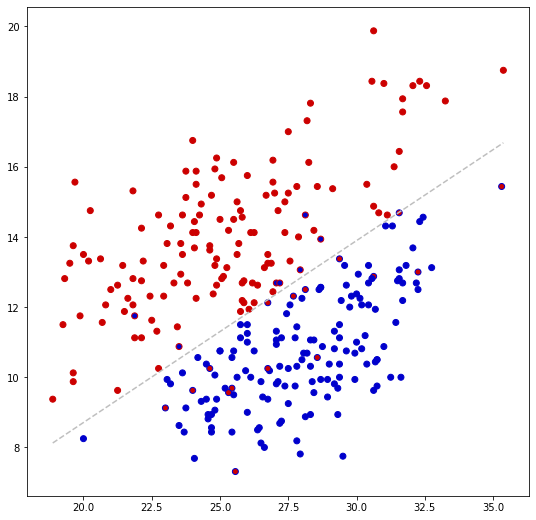

In [262]:
c = Perceptron(iterations=100000, one_five = True)
c.fit(X_train, y_train)
print("Accuracy:", np.mean(c.predict(X_test) == y_test))
y = np.array(c.predict(X_train))
visualize(X_train, y_train, y, c.w)

Считалось: 91.39596438407898 sec


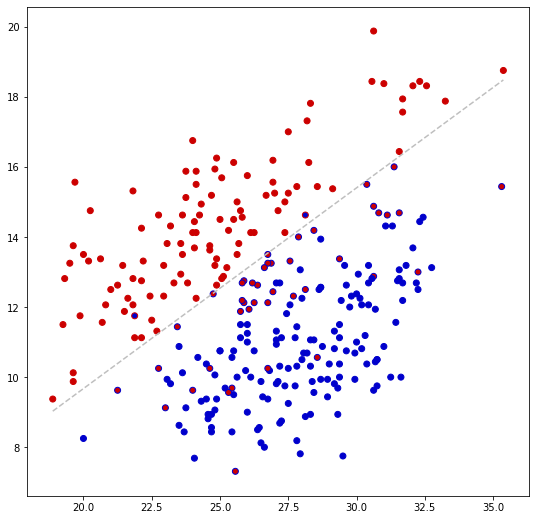

Accuracy: 0.8356164383561644


In [263]:
c = PerceptronBest(iterations=100000, one_five = True)
c.fit(X_train, y_train)
visualize(X_train, y_train, np.array(c.predict(X_train)), c.w)
print("Accuracy:", np.mean(c.predict(X_test) == y_test))

А теперь посчитаем среднюю точность по всем возможным парам цифр

In [264]:
accs = []
for y0, y1 in [(y0, y1) for y0 in range(9) for y1 in range(y0+1, 10)]:
    X, y = get_digits(y0, y1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)
    c = Perceptron(iterations=20000)
    c.fit(X_train, y_train)
    accs.append(np.mean(c.predict(X_test) == y_test))
print("Mean accuracy:", np.mean(accs))

Считалось: 18.941165447235107 sec
Считалось: 0.0020751953125 sec
Считалось: 0.002232789993286133 sec
Считалось: 0.004399299621582031 sec
Считалось: 0.002125978469848633 sec
Считалось: 0.0020856857299804688 sec
Считалось: 0.0037331581115722656 sec
Считалось: 0.002062082290649414 sec
Считалось: 0.002134561538696289 sec
Считалось: 22.58145499229431 sec
Считалось: 19.09313154220581 sec
Считалось: 17.75543761253357 sec
Считалось: 17.125847578048706 sec
Считалось: 18.225948095321655 sec
Считалось: 17.719151496887207 sec
Считалось: 17.543625831604004 sec
Считалось: 17.555720806121826 sec
Считалось: 0.0019421577453613281 sec
Считалось: 0.0019893646240234375 sec
Считалось: 0.002891063690185547 sec
Считалось: 0.0017924308776855469 sec
Считалось: 0.0018706321716308594 sec
Считалось: 0.002747774124145508 sec
Считалось: 0.0019221305847167969 sec
Считалось: 0.0020542144775390625 sec
Считалось: 0.0022323131561279297 sec
Считалось: 0.002025604248046875 sec
Считалось: 0.0020172595977783203 sec
Считалос

In [265]:
accs = []
for y0, y1 in [(y0, y1) for y0 in range(9) for y1 in range(y0+1, 10)]:
    X, y = get_digits(y0, y1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)
    c = PerceptronBest(iterations=20000)
    c.fit(X_train, y_train)
    accs.append(np.mean(c.predict(X_test) == y_test))
print("Mean accuracy:", np.mean(accs))

Считалось: 19.22241997718811 sec
Считалось: 0.002156972885131836 sec
Считалось: 0.0021581649780273438 sec
Считалось: 0.0023221969604492188 sec
Считалось: 0.002177000045776367 sec
Считалось: 0.002309083938598633 sec
Считалось: 0.0020966529846191406 sec
Считалось: 0.0021753311157226562 sec
Считалось: 0.0021638870239257812 sec
Считалось: 19.05608057975769 sec
Считалось: 19.48592972755432 sec
Считалось: 18.910609245300293 sec
Считалось: 18.909605503082275 sec
Считалось: 19.94269371032715 sec
Считалось: 22.801801204681396 sec
Считалось: 20.398321628570557 sec
Считалось: 20.693804025650024 sec
Считалось: 0.0021436214447021484 sec
Считалось: 0.002174854278564453 sec
Считалось: 0.002124786376953125 sec
Считалось: 0.0021212100982666016 sec
Считалось: 0.0021600723266601562 sec
Считалось: 0.002102375030517578 sec
Считалось: 0.002064943313598633 sec
Считалось: 0.0021882057189941406 sec
Считалось: 0.0020809173583984375 sec
Считалось: 0.002162456512451172 sec
Считалось: 0.0021402835845947266 sec
Счи